## Imports

In [63]:
import pandas as pd
import pickle 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
from sklearn import svm

## Train data

In [64]:
train = pd.read_csv('dataset/train.csv')


c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
train.head(2)

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,issue.1,issue.10,issue.11,issue.12,issue.13,issue.14,issue.15,issue.16,issue.17,issue.18,issue.19,issue.2,issue.20,issue.21,issue.22,issue.23,issue.24,issue.25,issue.26,issue.3,issue.4,issue.5,issue.6,issue.7,issue.8,issue.9,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,parties.1,parties.2,rank,respondent.0,respondent.1,respondent.2,respondent.3,respondent.4,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Columns: 328 entries, appno to importance
dtypes: bool(1), float64(1), int64(276), object(50)
memory usage: 22.2+ MB


## Numerical features

In [67]:
# list of numerical features
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

train[numerical_features].head()

Number of numerical variables:  278


,originatingbody,rank,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=19,paragraphs=32,paragraphs=P7-3,paragraphs=33,paragraphs=28-1-a,paragraphs=53,paragraphs=28,paragraphs=35-2-b,paragraphs=43,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,c

## Discrete numerical features

In [68]:
#list of discrete numerical features
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 ]

print("Discrete Features Count: {}".format(len(discrete_feature)))

Discrete Features Count: 275


## Continuous numerical features

In [69]:
#list of continuous numerical features
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

print("Continuous features Count {}".format(len(continuous_feature)))
continuous_feature

Continuous features Count 3


['rank', 'respondentOrderEng', 'sharepointid']

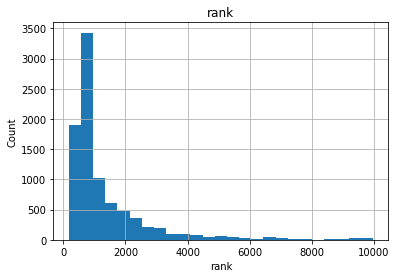

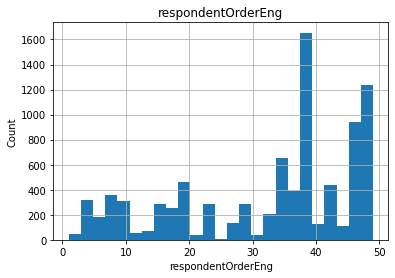

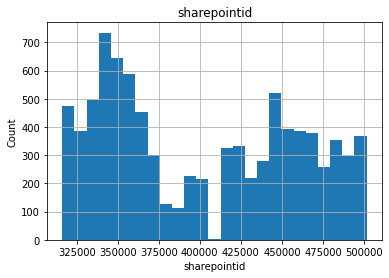

In [70]:
#visualize the distribution of continuous features
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Categorical features

In [71]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='O' and feature not in ['appno']]
len(categorical_features)

49

In [72]:
# Check for Categorical features which are missing
cat_features_nan=[feature for feature in train.columns if train[feature].isnull().sum()>1 and train[feature].dtypes=='O']

print("Out of the total {} categorical features, {} of them have null values as mentioned below:\n".format(len(categorical_features),len(cat_features_nan)))
for feature in cat_features_nan:
    print("{}: {}% missing values".format(feature,np.round(train[feature].isnull().mean(),4)))


Out of the total 49 categorical features, 35 of them have null values as mentioned below:

decisiondate: 0.9239% missing values
introductiondate: 0.9239% missing values
issue.0: 0.7468% missing values
issue.1: 0.8665% missing values
issue.10: 0.9976% missing values
issue.11: 0.9981% missing values
issue.12: 0.9983% missing values
issue.13: 0.9986% missing values
issue.14: 0.9989% missing values
issue.15: 0.9992% missing values
issue.16: 0.9995% missing values
issue.17: 0.9997% missing values
issue.18: 0.9998% missing values
issue.19: 0.9998% missing values
issue.2: 0.928% missing values
issue.20: 0.9998% missing values
issue.21: 0.9998% missing values
issue.22: 0.9998% missing values
issue.23: 0.9998% missing values
issue.24: 0.9999% missing values
issue.25: 0.9999% missing values
issue.26: 0.9999% missing values
issue.3: 0.9583% missing values
issue.4: 0.9763% missing values
issue.5: 0.9864% missing values
issue.6: 0.9913% missing values
issue.7: 0.994% missing values
issue.8: 0.9965%

In [73]:
# Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

In [74]:
train=replace_cat_feature(train,cat_features_nan)

In [75]:
#check if numerical variables the contains missing values
numerical_with_nan=[feature for feature in train.columns if train[feature].isnull().sum()>1 and train[feature].dtypes!='O']

numerical_with_nan

[]

In [76]:
#Convert the skewed distribution of continuos features into normal distribution
for feature in continuous_feature:
    train[feature]=np.log(train[feature])

In [77]:
train[continuous_feature]

,rank,respondentOrderEng,sharepointid
0,6.530028,3.637586,12.764024
1,7.879254,3.850148,13.074466
2,6.848232,3.761200,12.829854
3,7.022663,3.828641,12.880356
4,6.557945,3.637586,12.955364
...,...,...,...
8873,7.793365,3.871201,13.067971
8874,7.437461,3.637586,13.032301
8875,6.409363,3.637586,12.739119
8876,5.893065,3.784190,13.003415


In [78]:
#Replace the labels in categorical which occur less than 1% by Rare_label 
for feature in categorical_features:
    temp=train[feature].value_counts(normalize=True)
    temp_df=temp[temp>0.01].index
    train[feature]=np.where(train[feature].isin(temp_df),train[feature],'Rare_label')

## Create dummies for train data

In [79]:
# Get dummies
train_dummy = pd.get_dummies(train.drop(['appno','importance'],axis=1), prefix_sep='_', drop_first=True)
train_dummy

,originatingbody,rank,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=19,paragraphs=32,paragraphs=P7-3,paragraphs=33,paragraphs=28-1-a,paragraphs=53,paragraphs=28,paragraphs=35-2-b,paragraphs=43,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,c

In [80]:
train_dummy_columns = list(train_dummy.columns)
with open('train_dummy_columns.txt','w') as f:
    for listitem in train_dummy_columns:
        f.write('%s\n' % listitem)

## Feature scaling

In [81]:
#feature scaling
scaling_feature=[feature for feature in train_dummy.columns if feature not in ['appno','importance'] ]
len(scaling_feature)

417

In [82]:
#scaling using MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_dummy[scaling_feature])

MinMaxScaler()

In [83]:
scaler.transform(train_dummy[scaling_feature])

array([[0.        , 0.34116375, 0.93467475, ..., 0.        , 0.        ,
        0.        ],
       [0.88      , 0.67320456, 0.98929224, ..., 0.        , 0.        ,
        0.        ],
       [0.76      , 0.41947281, 0.96643725, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08      , 0.31146841, 0.93467475, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.18440903, 0.97234439, ..., 0.        , 0.        ,
        0.        ],
       [0.12      , 0.31170531, 0.91354374, ..., 0.        , 0.        ,
        0.        ]])

In [84]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [85]:
#concatenate all features in one variable
data = pd.concat([train[['appno','importance']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_dummy[scaling_feature]), columns=scaling_feature)],
                    axis=1)
data

,appno,importance,originatingbody,rank,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=19,paragraphs=32,paragraphs=P7-3,paragraphs=33,paragraphs=28-1-a,paragraphs=53,paragraphs=28,paragraphs=35-2-b,paragraphs=43,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2

## Input X and Y

In [86]:
y=data[['importance']]

In [87]:
X = data.drop(['appno','importance'],axis=1)

## Feature selection using Lasso Regression

In [88]:
# Lasso Regression model
# selectFromModel will select the features which coefficients are non-zero

model_features = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
model_features.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [89]:
#model_features.get_support()

In [90]:
selected_features = X.columns[(model_features.get_support())]

print('Total features: {}'.format((X.shape[1])))
print('Selected features using SelectfromModel: {}'.format(len(selected_features)))

Total features: 417
Selected features using SelectfromModel: 48


In [91]:
with open('selected_features.txt','w') as f:
    for listitem in list(selected_features):
        f.write('%s\n' % listitem)
    #f.write(str(list(train_dummy_columns)))

In [92]:
#use selected features do a train test split
X=X[selected_features]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

## Training SVM model

In [93]:
clf1 = svm.SVC()
clf1.fit(X_train,y_train)

c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [94]:
with open('svm_model.pkl','wb') as f:
    pickle.dump(clf1,f)

In [95]:
y_pred1=clf1.predict(X_test)

### Accuracy of the model

In [96]:
accuracy_score(y_test,y_pred1)

0.8592342342342343

### Confusion matrix

In [97]:
confusion_matrix(y_test,y_pred1)

array([[  45,    5,   53,    6],
       [  16,   10,   73,   12],
       [   4,    7,  343,   43],
       [   1,    0,   30, 1128]], dtype=int64)